In [1]:
import numpy as np

def criaDatasetBidimensionalBinárioInclinado(n=20, slop=[2, 1], intercept=0.4, dummy_features=3):
    """
    Cria um dataset bidimensional binário com
    algumas características inúteis.
    """
    X = np.random.uniform(size=(n,dummy_features+2))
    AUX = np.multiply(X[:,:2], slop)-[0, intercept]
    y = np.array(AUX[:,0]>AUX[:,1], dtype=int)*2-1
    return X, y

slop = [2, 1]
intercept = -0.4
dummy_features = 3
Xtr, ytr = criaDatasetBidimensionalBinárioInclinado(n=20, slop=slop, intercept=intercept, dummy_features=dummy_features)
Xtr, ytr

(array([[0.22581604, 0.76342988, 0.37696275, 0.41604473, 0.9336823 ],
        [0.00480744, 0.40381259, 0.67373435, 0.95258295, 0.65165558],
        [0.33662178, 0.6760306 , 0.951398  , 0.28783677, 0.37936193],
        [0.96324534, 0.71843079, 0.24413857, 0.49380522, 0.30395971],
        [0.72545075, 0.20600743, 0.59306459, 0.38697275, 0.46621619],
        [0.90853516, 0.01572801, 0.40256974, 0.67740817, 0.5210591 ],
        [0.15792178, 0.00616362, 0.50416332, 0.55624861, 0.30621845],
        [0.83878854, 0.21364465, 0.01527322, 0.50787238, 0.12988748],
        [0.75051653, 0.91156797, 0.6527264 , 0.0233996 , 0.85954157],
        [0.36734291, 0.19147497, 0.71239289, 0.98351973, 0.37668926],
        [0.95030755, 0.9219925 , 0.04548603, 0.76006917, 0.63946526],
        [0.041301  , 0.49843053, 0.90589488, 0.43627818, 0.29217623],
        [0.3416013 , 0.30460234, 0.55780835, 0.91697193, 0.91944147],
        [0.62365536, 0.73960772, 0.30461893, 0.77390713, 0.66161494],
        [0.49454024,

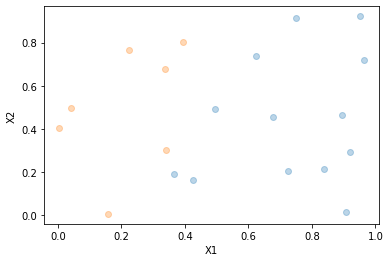

In [2]:
import matplotlib.pyplot as plt

def plotaDatasetBidimensional(X, y):
    """
    Plota um dataset bidimensional.
    """
    plt.xlabel('X1')
    plt.ylabel('X2')
    for k in set(y):
        plt.plot(X[:,0][y==k],X[:,1][y==k], "o", alpha=0.3)

plotaDatasetBidimensional(Xtr, ytr)

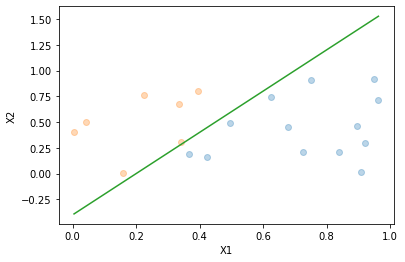

In [3]:
def plotaHiperplanoDatasetBidimensional(X, y, vetor, intercept=0):
    """
    Plota um dataset bidimensional com um hiperplano definido por um
    vetor e o valor em que este vetor intercepta o eixo vertical.
    """
    x0min = min(X[:,0])
    x0max = max(X[:,0])
    xs = np.linspace(x0min, x0max, num=2)
    ys = (-vetor[0] / vetor[1]) * xs - intercept / vetor[1]
    plt.plot(xs,ys)

plotaDatasetBidimensional(Xtr, ytr)
vetor_hyperplano = np.array(slop) * np.array([1, -1])
plotaHiperplanoDatasetBidimensional(Xtr, ytr, vetor_hyperplano, intercept)

In [4]:
def sign(a):
    return (a >= 0) * 2 - 1

In [5]:
def accuracy(yactual, ypred):
    return sum(yactual == ypred)/len(yactual)

In [6]:
from abc import ABC, abstractmethod

class TrainingAlgorithm(ABC):
    @abstractmethod
    def getW(self, X, y, activation):
        pass


class PseudoInversa(TrainingAlgorithm):
    def __init__(self, regularization=0):
        self.regularization = regularization
    def getW(self, X, y):
        if self.regularization == 0:
            return np.linalg.pinv(X) @ y
        return np.linalg.inv(X.T @ X + np.eye(X.shape[1])*self.regularization) @ X.T @ y


class DescidaGradiente(TrainingAlgorithm):
    def __init__(self, max_iter=250, learning_rate=0.02, regularization=0):
        self.max_iter = max_iter
        self.learning_rate = learning_rate
        self.regularization = regularization

    def getW(self, X, y):
        w = np.random.uniform(-1, 1, size=X.shape[1])
        for _ in range(self.max_iter):
            ypred = X @ w
            erros = y - ypred
            custo = sum(erros**2)
            if custo == 0:
                break
            w *= 1 - self.regularization * self.learning_rate
            w += (X.T @ erros) * self.learning_rate
        return w

0.95
[-1.27137606  2.61629273 -0.37598867 -0.12379573  0.72500837 -0.08693975]
9.151273258922044


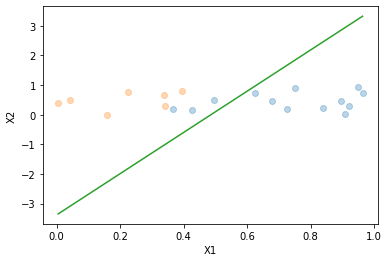

In [7]:
from sklearn.base import BaseEstimator, ClassifierMixin

class Perceptron(BaseEstimator, ClassifierMixin):
    """
    Versão Adaline do Perceptron com limite de iterações,
    treinado em batch, com bias e taxa de aprendizado.
    """
    def __init__(self, training_algorithm=DescidaGradiente()):
        self.w = None
        self.activation = sign
        self.training_algorithm = training_algorithm
    
    @staticmethod
    def includebias(X):
        bias = np.ones((X.shape[0],1))
        Xb = np.concatenate((bias,X), axis=1)
        return Xb

    def fit(self, X, y):
        Xb = Perceptron.includebias(X)
        self.w = self.training_algorithm.getW(Xb, y)
    
    def __pre_activation(self, X):
        Xb = Perceptron.includebias(X)
        return Xb @ self.w

    def predict(self, X):
        a = self.__pre_activation(X)
        ypred = self.activation(a)
        return ypred

perceptron = Perceptron()
perceptron.fit(Xtr, ytr)
print(accuracy(ytr, perceptron.predict(Xtr)))
print(perceptron.w)
plotaDatasetBidimensional(Xtr, ytr)
plotaHiperplanoDatasetBidimensional(Xtr, ytr, perceptron.w[1:], perceptron.w[0])
print(sum(perceptron.w**2))


In [8]:
Xte, yte = criaDatasetBidimensionalBinárioInclinado(n=1000, slop=slop, intercept=intercept, dummy_features=dummy_features)

0.877


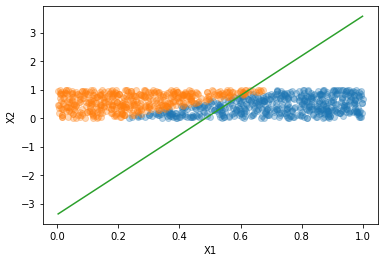

In [9]:
print(accuracy(yte, perceptron.predict(Xte)))
plotaDatasetBidimensional(Xte, yte)
plotaHiperplanoDatasetBidimensional(Xte, yte, perceptron.w[1:], perceptron.w[0])

0.95
[-0.33446214  1.55897326 -0.30332574 -0.38452135  0.26593313 -0.06483065]


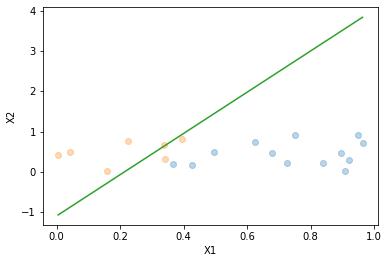

0.86
2.857049164152728


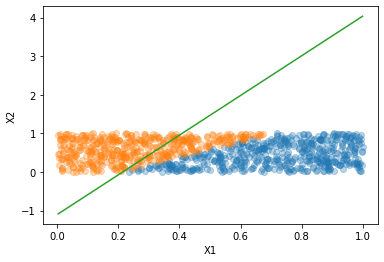

In [10]:
perceptron = Perceptron(training_algorithm=DescidaGradiente(regularization=1))
perceptron.fit(Xtr, ytr)
print(accuracy(ytr, perceptron.predict(Xtr)))
print(perceptron.w)
plotaDatasetBidimensional(Xtr, ytr)
plotaHiperplanoDatasetBidimensional(Xtr, ytr, perceptron.w[1:], perceptron.w[0])
plt.show()

print(accuracy(yte, perceptron.predict(Xte)))
plotaDatasetBidimensional(Xte, yte)
plotaHiperplanoDatasetBidimensional(Xte, yte, perceptron.w[1:], perceptron.w[0])
print(sum(perceptron.w**2))


In [11]:
perceptron = Perceptron(training_algorithm=DescidaGradiente(regularization=0))
perceptron.fit(Xtr, ytr)
print(accuracy(ytr, perceptron.predict(Xtr)), accuracy(yte, perceptron.predict(Xte)), perceptron.w)

perceptron = Perceptron(training_algorithm=DescidaGradiente(regularization=0.5))
perceptron.fit(Xtr, ytr)
print(accuracy(ytr, perceptron.predict(Xtr)), accuracy(yte, perceptron.predict(Xte)), perceptron.w)

perceptron = Perceptron(training_algorithm=DescidaGradiente(regularization=1))
perceptron.fit(Xtr, ytr)
print(accuracy(ytr, perceptron.predict(Xtr)), accuracy(yte, perceptron.predict(Xte)), perceptron.w)


0.95 0.879 [-1.22227212  2.59585867 -0.39670178 -0.15114542  0.697301   -0.08428333]
0.95 0.873 [-0.57880777  1.92363369 -0.36688104 -0.35955374  0.38114315 -0.07763994]
0.95 0.86 [-0.33461122  1.55903603 -0.30327283 -0.38444241  0.26601453 -0.06482548]


In [12]:
perceptron = Perceptron(training_algorithm=PseudoInversa(regularization=0))
perceptron.fit(Xtr, ytr)
print(accuracy(ytr, perceptron.predict(Xtr)), accuracy(yte, perceptron.predict(Xte)), perceptron.w)

perceptron = Perceptron(training_algorithm=PseudoInversa(regularization=0.5))
perceptron.fit(Xtr, ytr)
print(accuracy(ytr, perceptron.predict(Xtr)), accuracy(yte, perceptron.predict(Xte)), perceptron.w)

perceptron = Perceptron(training_algorithm=PseudoInversa(regularization=1))
perceptron.fit(Xtr, ytr)
print(accuracy(ytr, perceptron.predict(Xtr)), accuracy(yte, perceptron.predict(Xte)), perceptron.w)


0.95 0.868 [-1.45354966  2.69121511 -0.30536103 -0.02702824  0.8263833  -0.08578834]
0.95 0.874 [-0.58199887  1.9250213  -0.36562048 -0.35773145  0.3829144  -0.07780949]
0.95 0.86 [-0.33490478  1.55916007 -0.30315724 -0.38428045  0.26617791 -0.06483313]
